In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [102]:
dataset_path = "../dataset/dontpatronizeme_pcl.tsv"

dataset = pd.read_csv(dataset_path, sep="\t", skiprows=4, names=['par_id', 'art_id', 'keyword', 'country', 'text', 'orig_label'], index_col=0)
dataset.head()

,art_id,keyword,country,text,orig_label
par_id,,,,,
1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0
2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0
3,@@16584954,immigrant,ie,White House press secretary Sean Spicer said t...,0
4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0
5,@@1494111,refugee,ca,""" Just like we received migrants fleeing El Sa...",0


In [103]:
dataset.loc[dataset["text"].isna(), "text"] = ""

In [104]:
dataset["label"] = dataset["orig_label"].apply(lambda x : 0 if x == 0 or x == 1 else 1)
dataset.sample(10)

,art_id,keyword,country,text,orig_label,label
par_id,,,,,,
2939,@@21221988,refugee,jm,"But Divali , the Indian festival of lights , c...",0,0
7028,@@20383829,immigrant,ie,"Anger as Trump ends amnesty for 800,000 young ...",0,0
6333,@@1596962,disabled,us,Although Network Solutions has disabled the wi...,0,0
5639,@@2178157,homeless,lk,His wife and children felt the need to help th...,4,1
1389,@@3243086,migrant,za,"But last Sunday was different . Firstly , it w...",1,0
3549,@@4866253,poor-families,ph,Aside from the subdivision for urban poor fami...,0,0
1874,@@8393071,refugee,ng,"UK to take in up to 3,000 refugee children <h>...",0,0
5996,@@2822899,poor-families,gb,Real poverty of Britain : Shocking images of U...,3,1
3899,@@1859058,homeless,ke,Marsabit Governor Ukur Yattani told Crime Watc...,0,0


In [105]:
len(dataset.index)

10469

[]

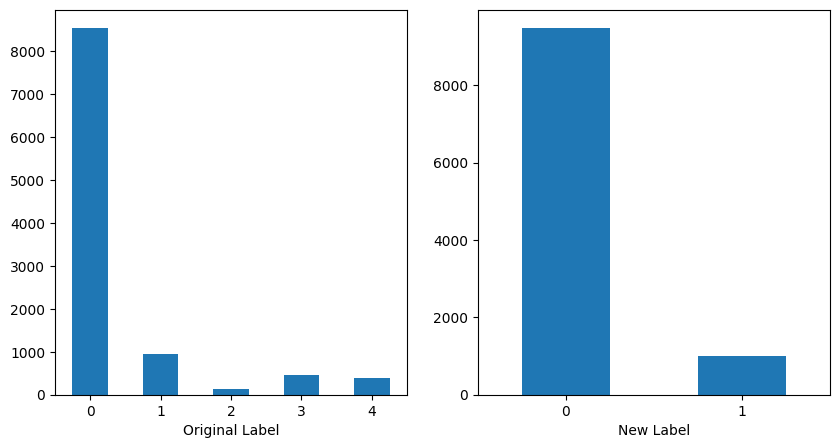

In [106]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
dataset["orig_label"].value_counts(sort=False).plot.bar(rot=0, ax=ax[0])
ax[0].set_xlabel("Original Label")
dataset["label"].value_counts(sort=False).plot.bar(rot=0, ax=ax[1])
ax[1].set_xlabel("New Label")
plt.plot()

In [107]:
original_label_groups = dataset.groupby(["orig_label"])

original_label_groups["text"].agg(lambda x: x.str.len().mean())

orig_label
0    262.306484
1    282.818374
2    269.270833
3    277.375546
4    304.953964
Name: text, dtype: float64

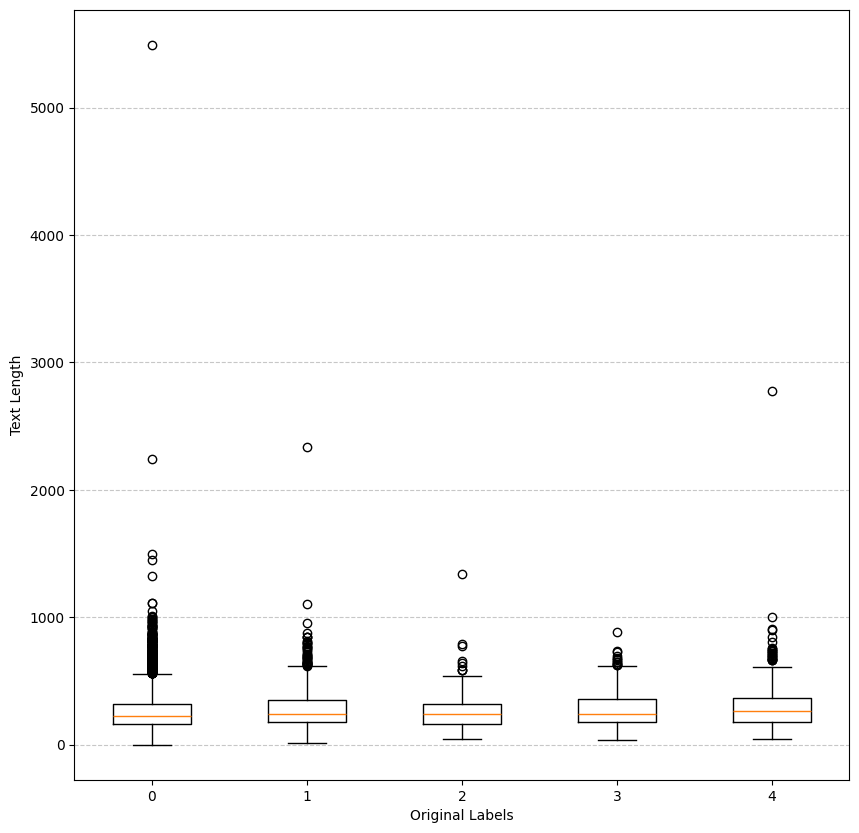

In [113]:
dataset["text_length"] = dataset["text"].str.len()

all_labels = [0, 1, 2, 3, 4]
text_lengths_per_label = [dataset[dataset["orig_label"] == label]["text_length"].values for label in all_labels]

plt.figure(figsize=(10, 10))
plt.boxplot(text_lengths_per_label, tick_labels=all_labels)
plt.xlabel("Original Labels")
plt.ylabel("Text Length")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [127]:
samples = original_label_groups.apply(lambda x: x.sample(1), include_groups=False)
pd.set_option('display.max_colwidth', None)
samples

,,art_id,keyword,country,text,label,text_length
orig_label,par_id,,,,,,
0,7590,@@16962839,women,sg,"Mid last year , Airbnb appointed Juliana Nguyen as head of marketing for APAC . She replaced Matthias Schuecking who exited the role after a two year long tenure with the company . Nguyen joins from Nike where she was its marketing director for around six years , where she was responsible for the growth of digital communities , grassroots and major event executions in the running and women 's categories .",0,408
1,1454,@@25386963,refugee,hk,"The ministry also said it will increase the number of officers tasked with reviewing refugee applications to significantly reduce the time necessary for deliberations so as to "" protect genuine refugees quickly and deal sternly with fake applicants . """,0,252
2,179,@@15574765,women,ca,"Jenny Neal , regional director of the Grandmothers Advocacy Network for Saskatchewan and Manitoba , displays her orange scarf at the sculpture Prairie Wind at River Landing , Thursday , November 24 , 2016 , to promote 16 days of orange to raise awareness about violence against women.Greg Pender / The StarPhoenix",1,313
3,6266,@@10061907,homeless,ph,It is miserable being poor and homeless in an affluent nation where one 's worth is measured by what one can afford to buy . Even those in the middle class with good and steady jobs struggle to keep their lifestyle .,1,216
4,8811,@@24844729,women,ie,""" They want to live in a country that treats women with compassion , "" the Minister for Health says . "" This is an Ireland that no longer says take the boat , take the plane ... today we say we want to stand with you . """,1,220


In [147]:
samples = original_label_groups.apply(lambda x: x.sample(1), include_groups=False)
texts = np.array(samples["text"].to_list())
texts = np.random.permutation(texts)
for text in texts:
    print(f"{text}\n")

Balu , an honest , hard-working labourer , who was injured by army shelling about 1993 leading to partial deafness , had latterly resettled in Tellipalai . While waiting to cross the KKS Rd. , he was killed by a navy vehicle with , as I learn , defective brakes , driven by a man without a heavy vehicle licence . When development fails the most vulnerable and poor , we have lost our way . It is well to remember Tagore in his essay on Nationalism : " ... speed comes to its end , the engagement loses its meaning and the hungry heart clamours for food , till at last she comes to the lowly reaper reaping his harvest in the sun . "

As reported by Sport24 , it 's widely expected that current South Africa rugby coach Allister Coetzee will see his contract terminated in the very new future . SARU would of course then be in need of a replacement , but even still , the muted appointment of Erasmus would raise eyebrows for a number of reasons . SA Rugby are believed to be currently working on a f

In [148]:
samples

,,art_id,keyword,country,text,label,text_length
orig_label,par_id,,,,,,
0,8415,@@16562036,in-need,ie,"As reported by Sport24 , it 's widely expected that current South Africa rugby coach Allister Coetzee will see his contract terminated in the very new future . SARU would of course then be in need of a replacement , but even still , the muted appointment of Erasmus would raise eyebrows for a number of reasons . SA Rugby are believed to be currently working on a five-year contract to be offered to Erasmus upon the sacking of Coetzee .",0,437
1,1537,@@24826282,disabled,in,""" I went to Europe and saw how disabled people live happy , independent lives . I wished my own people had this equipment , and I thought : ' This does n't look complicated . I 'm a mechanical engineer -- I can do it . ' """,0,222
2,966,@@4615045,homeless,jm,The group became so highly concerned with a homeless man whose plight was brought to national attention by the local news station when Tropical Storm Nicole struck the island back in September 2010 that they arranged with the St. Joseph ? s Golden Age Home to have the homeless man admitted as a resident . It was that episode that provided the impetus to make the St. Joseph ? s Golden Age Home Christmas Treat a now annual charity event on the social commentary group ? s calendar .,1,484
3,5442,@@15751247,vulnerable,lk,"Balu , an honest , hard-working labourer , who was injured by army shelling about 1993 leading to partial deafness , had latterly resettled in Tellipalai . While waiting to cross the KKS Rd. , he was killed by a navy vehicle with , as I learn , defective brakes , driven by a man without a heavy vehicle licence . When development fails the most vulnerable and poor , we have lost our way . It is well to remember Tagore in his essay on Nationalism : "" ... speed comes to its end , the engagement loses its meaning and the hungry heart clamours for food , till at last she comes to the lowly reaper reaping his harvest in the sun . """,1,633
4,1478,@@18406305,disabled,ke,"She said she has fought drug addiction , helped rehabilitate mentally ill persons and done a lot for the youth , women , the disabled and the community as a whole .",1,164


In [149]:
# TODO: See most frequent n-grams for each class